In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import f_decline, f_decline_R50, f_decline_R75, f_decline_R100, f_decline_mixed, f_mode
from MaaSSim.acceptance import RA_kpi_veh, RA_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
import folium
import h3

In [200]:
params = MaaSSim.utils.get_config('glance.json')
params.vehicle_fixed_positions = True
params.times.patience = 165 #in second 600
params.dist_threshold = 20000 #in meter
params.dist_threshold_min = 3000
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"

params.d2d.fuel_cost = 0.5 #euro/km
params.platforms.comm_rate = 0.25
params.platforms.base_fare = 2
params.platforms.fare = 1.2 
params.platforms.min_fare = 5
params.speeds.ride=10
params.times.decline=20
params.assert_me = False

params.paths.requests = 'Amsterdam_requests_new.csv'
params.dynamic_paricing = 'On'
params.zoning_level = 7
params.seed = 1

params.nP = 10000
params.nV = 500
params.start_time = pd.Timestamp('1900-01-01 08:00:00')
params.simTime = 8
params.end_time = params.start_time + pd.Timedelta(int(params.simTime), 'h')
# params.end_time = pd.Timestamp('1900-01-01 16:00:00')


pd.set_option('display.max_rows', 100)

In [201]:
sim500 = MaaSSim.simulators.simulate(params=params, f_trav_mode=f_mode, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

31-10-22 14:18:15-WARNING-Setting up 8h simulation at 1900-01-01 08:01:00 for 500 vehicles and 10000 passengers in Amsterdam, Netherlands
31-10-22 14:18:31-INFO--------------------	Starting simulation	-------------------
31-10-22 14:18:40-WARNING-pax 9350  got rejected by vehicle 7                1900-01-01 08:01:00
31-10-22 14:18:41-WARNING-pax 9018  got rejected by vehicle 22               1900-01-01 08:01:00
31-10-22 14:20:14-INFO-pax 7339  rejected vehicle 6                       1900-01-01 08:01:15
31-10-22 14:20:15-INFO-pax 2428  rejected vehicle 8                       1900-01-01 08:01:15
31-10-22 14:20:23-WARNING-pax 5484  got rejected by vehicle 169              1900-01-01 08:02:00
31-10-22 14:20:24-WARNING-pax 5742  got rejected by vehicle 301              1900-01-01 08:02:00
31-10-22 14:20:27-WARNING-pax 8288  got rejected by vehicle 446              1900-01-01 08:02:00
31-10-22 14:20:28-WARNING-pax 9499  got rejected by vehicle 308              1900-01-01 08:02:00
31-10-22 

In [202]:
sim500

In [ ]:
sim.res[0].veh_exp

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,REVENUE/hour,COST,IMPOSED_DELAY,AR,SURGE_FEES,AVE_SURGE_MP
veh,,,,,,,,,,,,,,,,,,,
1,79.487179,101.0232,12.627900,3857.0,39,31,7.0,229.11,7.390645,22911.0,1.920323,5.470323,215.5782,26.947275,114.555,112,70-80,37.736320,1.090323
2,76.923077,102.7358,12.841975,2948.0,39,30,9.0,245.15,8.171667,24515.0,2.134333,6.037333,225.3108,28.163850,122.575,159,70-80,37.083840,1.086667
3,85.714286,106.7174,13.339675,2900.0,35,30,4.0,242.09,8.069667,24209.0,1.988000,6.081667,227.7624,28.470300,121.045,64,80-90,51.329696,1.126667
4,78.048780,122.9738,15.371725,4167.0,41,32,6.0,228.11,7.128438,22811.0,1.218750,5.909688,237.0288,29.628600,114.055,189,70-80,42.461824,1.093750
5,82.500000,112.7064,14.088300,3597.0,40,33,7.0,236.52,7.167273,23652.0,1.507576,5.659697,230.9664,28.870800,118.260,337,80-90,23.019936,1.060606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,88.571429,100.9852,12.623150,4836.0,35,31,2.0,223.24,7.201290,22324.0,1.557097,5.644194,212.6052,26.575650,111.620,57,80-90,19.868800,1.045161
297,78.378378,120.4258,15.053225,5041.0,37,29,6.0,227.17,7.833448,22717.0,1.972069,5.861379,234.0108,29.251350,113.585,146,70-80,89.107360,1.200000
298,59.574468,93.9024,11.737800,4775.0,47,28,15.0,224.82,8.029286,22482.0,2.279643,5.749643,206.3124,25.789050,112.410,397,60 or less,41.553280,1.114286


In [ ]:
sim.res[0].pax_exp

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE,OFFER_REJECTED_BY_PAX,SURGE_MP
pax,,,,,,,
0,588.0,116.0,0.0,354.0,False,False,1.0
1,528.0,404.0,0.0,1097.0,False,False,1.4
2,1156.0,166.0,0.0,1055.0,False,False,1.0
3,936.0,335.0,0.0,686.0,False,False,1.0
4,Unfulfilled,180.0,0.0,0.0,True,False,no_offer
...,...,...,...,...,...,...,...
9995,Unfulfilled,180.0,0.0,0.0,True,False,no_offer
9996,416.0,256.0,0.0,336.0,False,False,1.2
9997,904.0,330.0,3.0,576.0,False,False,1


In [203]:
simlist = [sim100, sim200, sim300, sim400, sim500]
df = pd.DataFrame(columns=['simulation','surge_1', 'surge_1_2', 'surge_2_3', 'surge_3_4',
                           'surge_4_5'])
for sim in simlist:
    
    l1 = []; l2=[]; l3=[]; l4=[]; l5=[]
    for v in range(1, sim.params.nV+1):
        for s in sim.vehs[v].surge_mps.values():
            if s<=1:
                l1.append(s)
            elif s<=2:
                l2.append(s)
            elif s<=3:
                l3.append(s)
            elif s<=4:
                l4.append(s)
            elif s<=5:
                l5.append(s)

    t = len(l1) + len(l2)+ len(l3)+ len(l4)+ len(l5)
    new_row = {'surge_1':100*len(l1)/t, 'surge_1_2':100*len(l2)/t, 
               'surge_2_3':100*len(l3)/t, 'surge_3_4':100*len(l4)/t,
               'surge_4_5':100*len(l5)/t}
    df = df.append(new_row, ignore_index=True)
    
    # print('mp = 1 : ', 100*len(l1)/t, '%'); print('mp = 2 : ', 100*len(l2)/t, '%')
    # print('mp = 3 : ', 100*len(l3)/t, '%'); print('mp = 4 : ', 100*len(l4)/t, '%')
    # print('mp = 5 : ', 100*len(l5)/t, '%')
df.simulation = [100,200,300,400,500]
df

,simulation,surge_1,surge_1_2,surge_2_3,surge_3_4,surge_4_5
0,100,29.978065,58.615647,9.748964,1.291738,0.365586
1,200,47.249509,45.551502,6.385069,0.687623,0.126298
2,300,75.077229,21.822595,2.791262,0.286849,0.022065
3,400,90.929566,8.251433,0.757576,0.051188,0.010238
4,500,98.927533,0.962213,0.050115,0.060138,0.000000


<AxesSubplot:xlabel='AVE_SURGE_MP', ylabel='Count'>

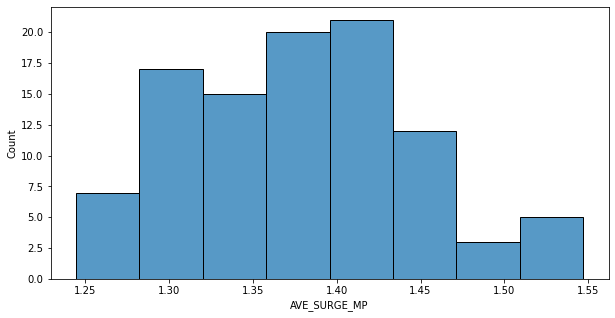

In [229]:
fig, ax = plt.subplots(ncols=1,figsize=(10,5))

sns.histplot(sim100.res[0].veh_exp.AVE_SURGE_MP, label='Average surge multipliers')

<AxesSubplot:xlabel='AVE_SURGE_MP', ylabel='ACCEPTANCE_RATE'>

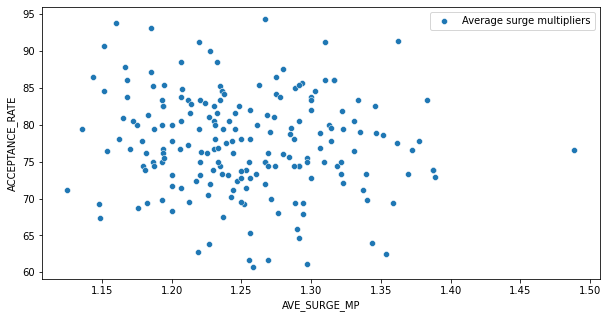

In [226]:
fig, ax = plt.subplots(ncols=1,figsize=(10,5))

df = sim200.res[0].veh_exp
sns.scatterplot(x=df.AVE_SURGE_MP, y=df.ACCEPTANCE_RATE, label='Average surge multipliers')

<AxesSubplot:xlabel='AVE_SURGE_MP', ylabel='PROFIT'>

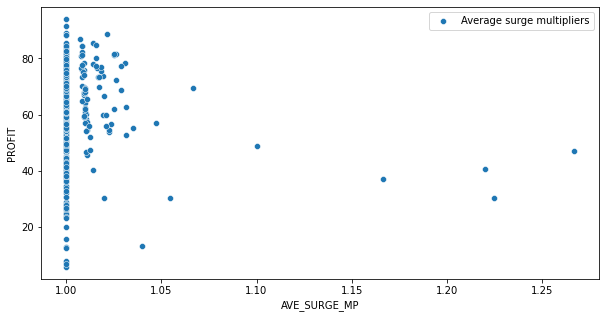

In [232]:
fig, ax = plt.subplots(ncols=1,figsize=(10,5))

df = sim500.res[0].veh_exp
sns.scatterplot(x=df.AVE_SURGE_MP, y=df.PROFIT, label='Average surge multipliers')

<AxesSubplot:xlabel='AVE_PICKUP_DIST', ylabel='AVE_SURGE_MP'>

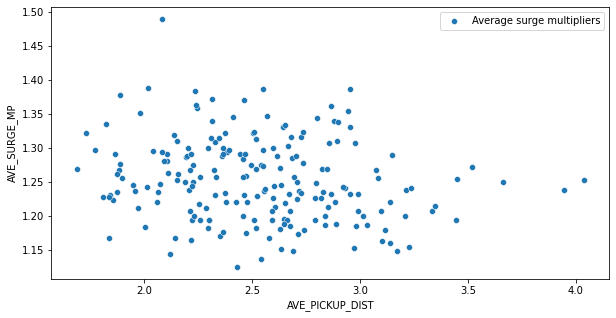

In [233]:
fig, ax = plt.subplots(ncols=1,figsize=(10,5))

df = sim200.res[0].veh_exp
sns.scatterplot(x=df.AVE_PICKUP_DIST, y=df.AVE_SURGE_MP, label='Average surge multipliers')

In [250]:
df = sim500.res[0].pax_exp
len(df.loc[df.OFFER_REJECTED_BY_PAX==True])

20

In [ ]:
fig, ax = plt.subplots(ncols=1,figsize=(10,5))

df = sim200.res[0].pax_exp
sns.kdeplot(df.WAIT_TIME, label='Average surge multipliers')

In [241]:
sim500.res[0].pax_exp

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE,OFFER_REJECTED_BY_PAX,SURGE_MP
pax,,,,,,,
0,292.0,62.0,0.0,354.0,False,False,1.0
1,1892.0,389.0,1.0,1097.0,False,False,1.0
2,2048.0,166.0,1.0,1055.0,False,False,1.0
3,1616.0,48.0,0.0,686.0,False,False,1.0
4,192.0,395.0,0.0,769.0,False,False,1.0
...,...,...,...,...,...,...,...
9995,2062.0,482.0,2.0,423.0,False,False,1.0
9996,1664.0,87.0,0.0,336.0,False,False,1.0
9997,24.0,207.0,0.0,576.0,False,False,1.0


In [218]:
df = sim200.res[0].veh_exp
df.loc[df.AVE_SURGE_MP>1.35]

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,REVENUE/hour,COST,IMPOSED_DELAY,AR,SURGE_FEES,AVE_SURGE_MP
veh,,,,,,,,,,,,,,,,,,,
13,77.500000,140.8942,17.611775,1128.0,40,31,6.0,260.05,8.388710,26005.0,2.865161,5.523548,270.9192,33.864900,130.025,275,70-80,185.218752,1.361290
15,73.333333,159.0040,19.875500,743.0,45,33,4.0,257.35,7.798485,25735.0,2.463939,5.334545,287.6790,35.959875,128.675,253,70-80,219.084224,1.369697
26,76.595745,192.6404,24.080050,494.0,47,36,6.0,263.78,7.327222,26378.0,2.083889,5.243333,324.5304,40.566300,131.890,315,70-80,342.504960,1.488889
35,62.500000,132.4854,16.560675,898.0,48,30,9.0,256.62,8.554000,25662.0,2.945333,5.608667,260.7954,32.599425,128.310,627,60-70,162.364128,1.353333
62,73.809524,153.0058,19.125725,1317.0,42,31,4.0,253.57,8.179677,25357.0,2.550000,5.629677,279.7908,34.973850,126.785,128,70-80,206.679392,1.387097
69,72.916667,174.9886,21.873575,824.0,48,35,6.0,256.54,7.329714,25654.0,2.019143,5.310571,303.2586,37.907325,128.270,152,70-80,253.757152,1.388571
75,69.387755,166.3212,20.790150,618.0,49,34,8.0,256.80,7.552941,25680.0,2.245000,5.307941,294.7212,36.840150,128.400,217,60-70,243.972320,1.358824
77,77.777778,191.6430,23.955375,706.0,45,35,7.0,265.17,7.576286,26517.0,1.890857,5.685429,324.2280,40.528500,132.585,244,70-80,322.324576,1.377143
110,83.333333,154.4728,19.309100,945.0,42,35,5.0,256.36,7.324571,25636.0,2.236286,5.088286,282.6528,35.331600,128.180,256,80-90,224.899808,1.382857


In [223]:
df = sim200.res[0].veh_exp
df.loc[df.PROFIT>170]

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,REVENUE/hour,COST,IMPOSED_DELAY,AR,SURGE_FEES,AVE_SURGE_MP
veh,,,,,,,,,,,,,,,,,,,
26,76.595745,192.6404,24.080050,494.0,47,36,6.0,263.78,7.327222,26378.0,2.083889,5.243333,324.5304,40.566300,131.890,315,70-80,342.504960,1.488889
33,81.818182,171.1062,21.388275,758.0,44,36,4.0,260.97,7.249167,26097.0,1.729167,5.520000,301.5912,37.698900,130.485,296,80-90,156.784224,1.322222
69,72.916667,174.9886,21.873575,824.0,48,35,6.0,256.54,7.329714,25654.0,2.019143,5.310571,303.2586,37.907325,128.270,152,70-80,253.757152,1.388571
77,77.777778,191.6430,23.955375,706.0,45,35,7.0,265.17,7.576286,26517.0,1.890857,5.685429,324.2280,40.528500,132.585,244,70-80,322.324576,1.377143


In [217]:
sim200.res[0].veh_exp.PROFIT.max()

192.64039999999997

In [23]:
df = pd.read_csv('max_ds_dfl7.csv')
list(df.hex_address)
# sim200_surge_17.request_zone['surge0'].
surgez_table = pd.DataFrame(columns=['zone', 'n_surge = 0', 'n_surge = 1', 'n_surge = 2', 'n_surge = 3'])
z_list = list(df.hex_address)
surgez_table.zone = z_list

for z in range(0, len(z_list)):
    for fee in range(0,4):
        surgez_table.at[z,'n_surge = {}'.format(fee)] = sim200_surge_17.request_zone['surge{}'.format(fee)].count(surgez_table.zone[z])

surgez_table

,zone,n_surge = 0,n_surge = 1,n_surge = 2,n_surge = 3
0,871968240ffffff,2,0,0,0
1,871968241ffffff,12,0,2,0
2,871968244ffffff,4,0,0,1
3,871968245ffffff,2,0,0,0
4,871968248ffffff,7,0,0,0
5,871968249ffffff,32,7,3,1
6,87196824cffffff,8,0,1,0
7,87196824dffffff,75,35,5,1
8,871968263ffffff,0,0,0,0
9,871968268ffffff,13,0,0,0


<AxesSubplot:xlabel='total_n_surges', ylabel='Count'>

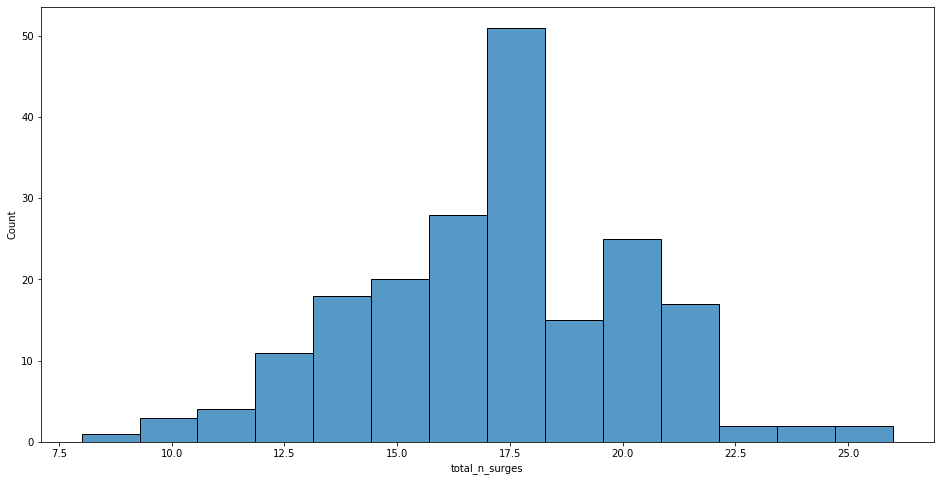

In [67]:
fig, ax = plt.subplots(ncols=1,figsize=(16,8))

sns.histplot(t1.total_n_surges, label='Zoning level 6')
sns.histplot(t2.total_n_surges, label='Zoning level 7')


In [58]:
t2 = surge_table

In [24]:
df = sim200_surge_16.res[0].pax_kpi
df.to_csv('pax_kpi_2006.csv')
df

,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE,nP
sum,2.519473e+06,1192.000000,3.729653e+06,3474.000000,10000
mean,2.519473e+02,0.119200,3.729653e+02,0.347400,10000
std,1.920319e+02,0.368789,3.303865e+02,0.476168,10000


In [25]:
df = sim200_surge_16.res[0].pax_exp
df.to_csv('pax_exp_2006.csv')
df

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE
pax,,,,,
0,552.0,250.0,0.0,354.0,False
1,Unfulfilled,195.0,0.0,0.0,True
2,Unfulfilled,195.0,0.0,0.0,True
3,336.0,328.0,0.0,686.0,False
4,Unfulfilled,195.0,0.0,0.0,True
...,...,...,...,...,...
9995,148.0,221.0,0.0,423.0,False
9996,Unfulfilled,195.0,0.0,0.0,True
9997,636.0,619.0,0.0,576.0,False


In [26]:
df = sim200_surge_16.res[0].veh_kpi
df.to_csv('veh_kpi_2006.csv')
df

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR,nV
sum,16854.855243,51109.271000,6388.658875,165746.000000,7771.000000,6526.000000,1245.000000,52238.260000,1610.74605,5.223826e+06,462.952197,1147.793854,64168.836000,6361.000000,8021.104500,13059.565000,63743.000000,80-9070-8080-9090-10090-10080-9070-8080-9080-9...,200
mean,84.274276,255.546355,31.943294,828.730000,38.855000,32.630000,6.225000,261.191300,8.05373,2.611913e+04,2.314761,5.738969,320.844180,31.805000,40.105522,65.297825,318.715000,NaN,200
std,5.767579,16.500837,2.062605,246.480344,3.486366,2.466479,2.632303,4.494591,0.66874,4.494591e+02,0.409772,0.407075,16.431362,4.664306,2.053920,1.123648,180.380764,NaN,200


In [27]:
df = sim200_surge_16.res[0].veh_exp
df.to_csv('veh_exp_2006.csv')
df

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR
veh,,,,,,,,,,,,,,,,,,
1,82.500000,262.5120,32.814000,835.0,40,33,7.0,263.04,7.970909,26304.0,2.181212,5.789697,328.272,33,41.0340,65.7600,314,80-90
2,78.571429,260.7265,32.590812,697.0,42,33,9.0,260.39,7.890606,26039.0,2.162727,5.727879,325.824,33,40.7280,65.0975,633,70-80
3,86.486486,240.0980,30.012250,512.0,37,32,5.0,262.84,8.213750,26284.0,2.671875,5.541875,305.808,29,38.2260,65.7100,159,80-90
4,97.297297,279.3365,34.917063,799.0,37,36,1.0,260.59,7.238611,26059.0,1.625556,5.613056,344.484,30,43.0605,65.1475,15,90-100
5,94.117647,261.7360,32.717000,371.0,34,32,2.0,265.84,8.307500,26584.0,2.312813,5.994688,328.196,34,41.0245,66.4600,173,90-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,80.952381,254.4570,31.807125,1323.0,42,34,8.0,252.94,7.439412,25294.0,2.103824,5.335588,317.692,32,39.7115,63.2350,456,80-90
197,73.333333,246.8465,30.855812,799.0,45,33,12.0,259.03,7.849394,25903.0,2.480606,5.368788,311.604,33,38.9505,64.7575,370,70-80
198,79.069767,261.6245,32.703063,1542.0,43,34,9.0,251.31,7.391471,25131.0,1.841176,5.550294,324.452,30,40.5565,62.8275,445,70-80


<AxesSubplot:xlabel='WAIT_TIME', ylabel='Count'>

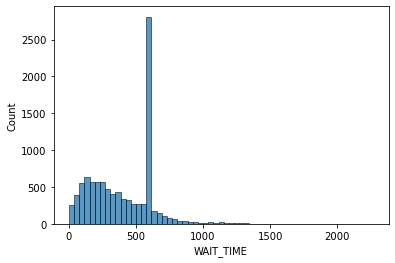

In [224]:
sns.histplot(pax.WAIT_TIME)

In [20]:
surge_list = []
for veh in range(1,params.nV+1):
    
    surge_list = surge_list + sim200_surge_17.vehs[veh].surge_fees
    
surge_list

[0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 3,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 2,


In [22]:
for i in surge_list:
    if i>2:
        print(i)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [ ]:
max_ds = 

math.ceil((3/(max_ds-1))*ds - (3/(max_ds-1)))

In [202]:
sim200.vehs

{1: <MaaSSim.driver.VehicleAgent at 0x1bf60359d00>,
 2: <MaaSSim.driver.VehicleAgent at 0x1c15a73c610>,
 3: <MaaSSim.driver.VehicleAgent at 0x1c15a73c0d0>,
 4: <MaaSSim.driver.VehicleAgent at 0x1c1564474c0>,
 5: <MaaSSim.driver.VehicleAgent at 0x1c156447910>,
 6: <MaaSSim.driver.VehicleAgent at 0x1c156447d60>,
 7: <MaaSSim.driver.VehicleAgent at 0x1c1564458e0>,
 8: <MaaSSim.driver.VehicleAgent at 0x1c156445a30>,
 9: <MaaSSim.driver.VehicleAgent at 0x1c1564456d0>,
 10: <MaaSSim.driver.VehicleAgent at 0x1c156445100>,
 11: <MaaSSim.driver.VehicleAgent at 0x1c15645bd90>,
 12: <MaaSSim.driver.VehicleAgent at 0x1c15645b970>,
 13: <MaaSSim.driver.VehicleAgent at 0x1c15645b370>,
 14: <MaaSSim.driver.VehicleAgent at 0x1c1564290d0>,
 15: <MaaSSim.driver.VehicleAgent at 0x1c1564294f0>,
 16: <MaaSSim.driver.VehicleAgent at 0x1c156429940>,
 17: <MaaSSim.driver.VehicleAgent at 0x1c156429d90>,
 18: <MaaSSim.driver.VehicleAgent at 0x1c156421d90>,
 19: <MaaSSim.driver.VehicleAgent at 0x1c156421af0>,
 2

In [209]:
max_ds = 60
ds = 45
math.ceil((3/(max_ds-1))*ds - (3/(max_ds-1)))

3

In [229]:
sim200_1.concat_sdf

,hex_address,cnt,demand,supply,D/S,surge_mp
0,871968240ffffff,11,0,0,0.0,0
1,871968241ffffff,12,0,0,0.0,0
2,871968244ffffff,12,0,0,0.0,0
3,871968245ffffff,30,0,0,0.0,0
4,871968248ffffff,34,0,0,0.0,0
...,...,...,...,...,...,...
50,871969c9effffff,536,0,3,0.0,0
51,871969cabffffff,5,0,0,0.0,0
52,871969cd0ffffff,95,0,0,0.0,0
53,871969cd2ffffff,13,0,0,0.0,0


In [46]:
sims = [sim200_16, sim200_26, sim200_36, sim200_46, sim200_56]
# sims = [sim200_1, sim200_2, sim200_3, sim200_4, sim200_5]

df = pd.DataFrame(index=sims[0].concat_sdf.groupby(['hex_address']).max().index)

for i in range(1,len(sims)+1):
    df['sim{}'.format(i)] = sims[i-1].concat_sdf.groupby(['hex_address']).max()['D/S']
    
df['ave_max'] = df.mean(axis=1)
print(df.ave_max.mean())
df.to_csv('max_ds_dfl6.csv')
# df.to_csv('max_ds_dfl7.csv')
df

15.700000000000001


,sim1,sim2,sim3,sim4,sim5,ave_max
hex_address,,,,,,
861968247ffffff,2.0,4.0,2.0,2.0,2.0,2.4
86196824fffffff,12.0,11.0,13.0,11.0,11.0,11.6
861968267ffffff,1.0,0.0,0.0,0.0,0.0,0.2
86196826fffffff,25.0,20.0,17.0,17.0,18.0,19.4
861969507ffffff,11.0,11.0,12.0,6.0,9.0,9.8
861969517ffffff,1.0,2.0,2.0,2.0,2.0,1.8
861969527ffffff,56.0,47.0,56.0,45.0,61.0,53.0
861969537ffffff,64.0,59.0,58.0,62.0,58.0,60.2
861969c87ffffff,4.0,4.0,2.0,2.0,2.0,2.8


In [43]:
def visualize_hexagons(hexagons, color="red", w=1, folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=w,color=color,fill= True)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

In [3]:
G = sim200.inData.G
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=0, bgcolor='black', 
                        edge_color=(0.933, 0.65, 0.059))

NameError: name 'sim200' is not defined

In [1]:
# Visualiziation of hexagons on Amsterdam map
lat = []
lng = []
for i in G.nodes:
    lat.append(G.nodes[i]['y'])
    lng.append(G.nodes[i]['x'])
    
df = pd.DataFrame()
df['lat'] = lat
df['lng'] = lng

level = 7
hex_col = 'hex'+str(level)
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,level),axis=1)
df = df.groupby(hex_col).size().to_frame('cnt').reset_index()

l = list(df[hex_col])
m = visualize_hexagons(l)
display(m)

NameError: name 'G' is not defined

In [46]:
hex_address = ['871969c9bffffff']
# hex_address = f.loc[f.bucket=='acc_above5'].zone.unique()
# hex_address = ['871969c9bffffff', '871969535ffffff', '871969534ffffff', '871969526ffffff', '871969522ffffff']
m = visualize_hexagons(hex_address)
display(m)

In [5]:
df = pd.read_csv('veh_exp_2007.csv')
df

,veh,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR
0,1,80.952381,258.3380,32.292250,530.0,42,34,8.0,262.28,7.714118,26228.0,2.079118,5.635000,323.908,26,40.4885,65.5700,467,80-90
1,2,88.888889,247.3540,30.919250,561.0,36,32,4.0,266.36,8.323750,26636.0,2.335625,5.988125,313.944,20,39.2430,66.5900,69,80-90
2,3,88.888889,248.2620,31.032750,789.0,36,32,4.0,260.28,8.133750,26028.0,2.239688,5.894063,313.332,23,39.1665,65.0700,112,80-90
3,4,87.500000,255.8985,31.987313,646.0,40,35,5.0,265.35,7.581429,26535.0,2.123429,5.458000,322.236,23,40.2795,66.3375,161,80-90
4,5,71.739130,253.1940,31.649250,585.0,46,33,13.0,258.36,7.829091,25836.0,2.076970,5.752121,317.784,24,39.7230,64.5900,700,70-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,74.358974,223.4115,27.926437,858.0,39,29,10.0,259.33,8.942414,25933.0,2.757241,6.185172,288.244,15,36.0305,64.8325,289,70-80
196,197,86.842105,256.1295,32.016188,894.0,38,33,5.0,257.69,7.808788,25769.0,1.885758,5.923030,320.552,20,40.0690,64.4225,248,80-90
197,198,96.875000,249.4880,31.186000,919.0,32,31,1.0,273.76,8.830968,27376.0,2.461935,6.369032,317.928,19,39.7410,68.4400,15,90-100
198,199,84.210526,232.0660,29.008250,627.0,38,32,6.0,269.96,8.436250,26996.0,2.822812,5.613437,299.556,20,37.4445,67.4900,268,80-90


In [12]:
df.REVENUE.sum() - df.COST.sum()

48764.8085

In [9]:
df.PROFIT.sum()

48764.8085

In [11]:
48764.8085-44472.8085

4292.0

In [13]:
df.surge_fee.sum()

4292

In [14]:
df = pd.read_csv('veh_kpi_2007.csv')
df

,Unnamed: 0,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR,nV
0,sum,16810.788713,48764.808500,6095.601062,160888.000000,7794.000000,6522.000000,1272.000000,52235.310000,1610.284328,5.223531e+06,468.550912,1141.733416,61823.636000,4292.000000,7727.954500,13058.827500,63608.000000,80-9080-9080-9080-9070-8080-9070-8070-8080-909...,200
1,mean,84.053944,243.824042,30.478005,804.440000,38.970000,32.610000,6.360000,261.176550,8.051422,2.611765e+04,2.342755,5.708667,309.118180,21.460000,38.639772,65.294137,318.040000,NaN,200
2,std,6.207495,14.764863,1.845608,239.828616,3.561252,2.307493,2.883047,4.527671,0.618778,4.527671e+02,0.360295,0.439578,14.904292,4.497727,1.863037,1.131918,188.085403,NaN,200


In [4]:
m = 5
ds = 3.5
surge_mp = round(4/(m-1))*ds + ((m-5)/(m-1))
surge_mp

3.5

In [6]:
round(2.444, 2)

2.44

In [60]:
df = pd.read_csv('veh_kpi_2007.csv')
df

,Unnamed: 0,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR,nV
0,sum,16810.788713,48764.808500,6095.601062,160888.000000,7794.000000,6522.000000,1272.000000,52235.310000,1610.284328,5.223531e+06,468.550912,1141.733416,61823.636000,4292.000000,7727.954500,13058.827500,63608.000000,80-9080-9080-9080-9070-8080-9070-8070-8080-909...,200
1,mean,84.053944,243.824042,30.478005,804.440000,38.970000,32.610000,6.360000,261.176550,8.051422,2.611765e+04,2.342755,5.708667,309.118180,21.460000,38.639772,65.294137,318.040000,NaN,200
2,std,6.207495,14.764863,1.845608,239.828616,3.561252,2.307493,2.883047,4.527671,0.618778,4.527671e+02,0.360295,0.439578,14.904292,4.497727,1.863037,1.131918,188.085403,NaN,200


In [59]:
df.PROFIT.sum()

AttributeError: 'DataFrame' object has no attribute 'PROFIT'

In [55]:
df.surge_fee.sum()

4292

In [63]:
2+1.2*5.708667

8.8504004